# Import Library

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
from wordcloud import WordCloud
from collections import Counter

In [5]:
import pickle

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [7]:
file_path = '/content/drive/MyDrive/Final-Project-Fake-News-Classification/news.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


Dataset Terdiri dari 6335 baris dan 4 kolom: 'Unnamed: 0', 'title', 'text', dan 'label'.
Kolom 'Unnamed: 0' terlihat seperti indeks atau ID.
Kolom 'title' dan 'text' berisi teks berita.
Kolom 'label' berisi kelas target, yaitu 'FAKE' atau 'REAL'.

# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


Output df.info() memberikan informasi penting tentang struktur dataset, termasuk jumlah baris dan kolom, tipe data setiap kolom, dan keberadaan nilai yang hilang. Dalam kasus ini, kita melihat bahwa tidak ada nilai yang hilang (non-null count sama dengan jumlah total entries untuk semua kolom).

In [9]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


Fungsi describe() secara default memberikan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame. Dalam kasus ini, satu-satunya kolom numerik adalah "Unnamed: 0".Output df.describe() untuk kolom "Unnamed: 0" memberikan gambaran tentang distribusi nilai indeks asli. Namun, karena ini hanyalah indeks dan tidak mewakili fitur yang bermakna untuk klasifikasi, statistik ini mungkin tidak terlalu relevan untuk tujuan pemodelan.

In [10]:
# 1. cek missing value
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


Output ini dengan jelas menunjukkan bahwa tidak ada nilai yang hilang (jumlahnya 0 untuk setiap kolom) dalam seluruh DataFrame.

In [11]:
# 2. cek duplikasi data
df.duplicated().sum()

np.int64(0)

menunjukkan bahwa tidak ada baris duplikat dalam DataFrame. Ini penting untuk memastikan bahwa model tidak dilatih pada data yang berulang, yang dapat menyebabkan bias.


Label Distribution:
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


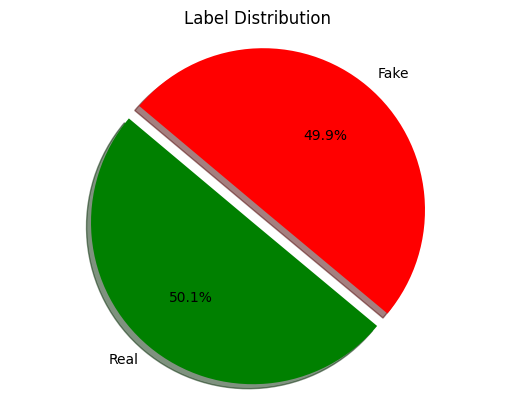

In [12]:
# 3. distribusi dalam pie chart
print("\nLabel Distribution:")
print(df['label'].value_counts())
labels = df['label'].value_counts()
colors = ['green', 'red']
explode = (0.1, 0)
plt.pie(labels, labels=['Real', 'Fake'], colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Label Distribution')
plt.show()

Distribusi label dalam dataset sangat seimbang. Hampir separuh data diklasifikasikan sebagai berita asli dan separuhnya lagi sebagai berita palsu.Keseimbangan label ini positif untuk pelatihan model klasifikasi karena model tidak akan bias terhadap kelas mayoritas. Akurasi yang baik pada dataset ini kemungkinan besar mencerminkan kemampuan model dalam memprediksi kedua kelas dengan baik.

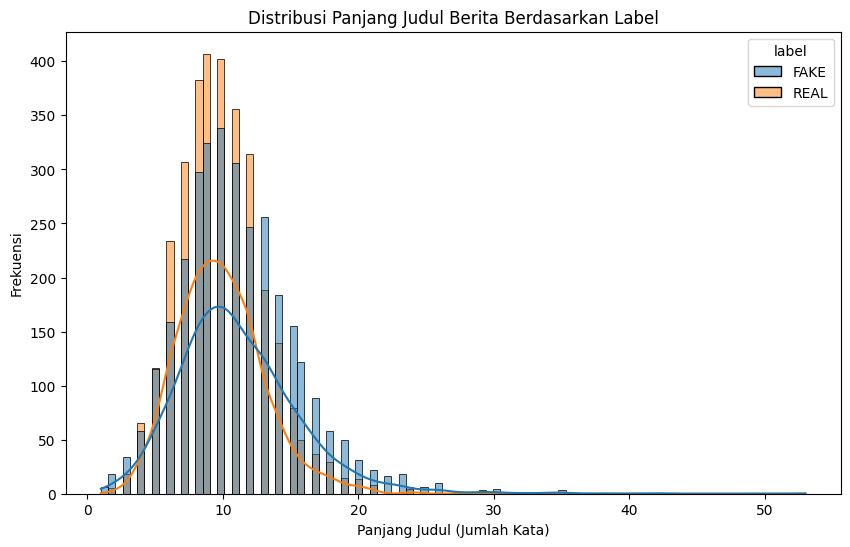

In [13]:
# 4. Panjang Jusul Berita
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='title_length', hue='label', kde=True)
plt.title('Distribusi Panjang Judul Berita Berdasarkan Label')
plt.xlabel('Panjang Judul (Jumlah Kata)')
plt.ylabel('Frekuensi')
plt.show()

Insight: Distribusi panjang judul untuk kedua kelas label terlihat cukup mirip, dengan sebagian besar judul memiliki panjang antara 5 hingga 15 kata. Namun, ada sedikit lebih banyak judul berita REAL yang cenderung lebih panjang dibandingkan berita FAKE. Ini bisa menjadi salah satu fitur halus yang dapat dipelajari oleh model.

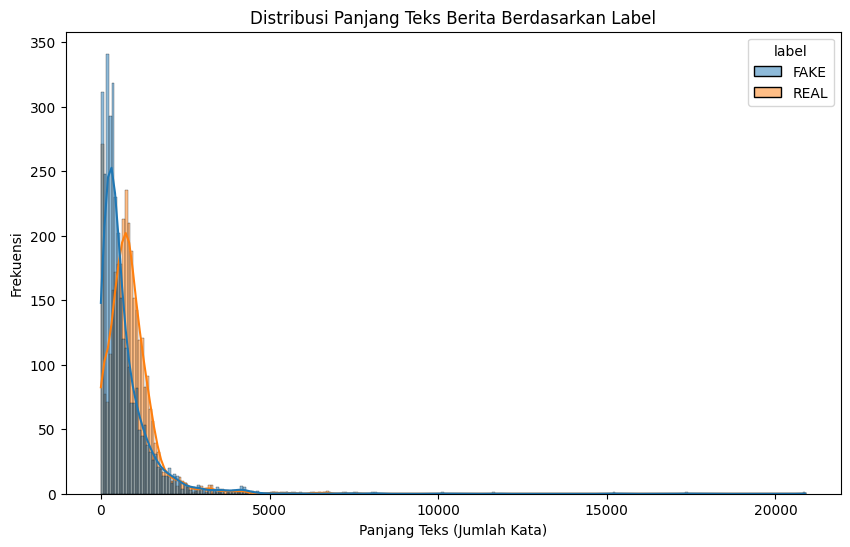

In [14]:
# 5. Panjang Teks Berita
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', kde=True)
plt.title('Distribusi Panjang Teks Berita Berdasarkan Label')
plt.xlabel('Panjang Teks (Jumlah Kata)')
plt.ylabel('Frekuensi')
plt.show()

Insight: Distribusi panjang teks antara berita FAKE dan REAL menunjukkan perbedaan yang lebih signifikan dibandingkan dengan panjang judul. Berita REAL cenderung memiliki panjang teks yang lebih bervariasi dan seringkali lebih panjang dibandingkan berita FAKE yang sebagian besar terkonsentrasi pada panjang teks yang lebih pendek. Namun, ada juga beberapa berita FAKE yang memiliki panjang teks yang sangat panjang.

Distribusi panjang teks untuk kedua label menunjukkan perbedaan yang lebih jelas dibandingkan dengan panjang judul. Berita 'REAL' cenderung memiliki distribusi yang lebih lebar dan memanjang ke arah teks yang lebih panjang. Sementara itu, berita 'FAKE' cenderung terkonsentrasi pada panjang teks yang lebih pendek.

In [15]:
# 1. Statistik Deskriptif Panjang Teks Berdasarkan Label
print("\nStatistik Deskriptif Panjang Teks Berita:")
print(df.groupby('label')['text_length'].describe())


Statistik Deskriptif Panjang Teks Berita:
        count        mean         std  min    25%    50%     75%      max
label                                                                    
FAKE   3164.0  679.129267  958.962790  0.0  212.0  421.0   830.0  20891.0
REAL   3171.0  873.257647  722.483569  7.0  450.5  771.0  1123.0   7602.0


1. Mean: Rata-rata panjang teks berita 'REAL' (sekitar 873 kata) jauh lebih tinggi dibandingkan dengan berita 'FAKE' (sekitar 679 kata).
2. Std: Standar deviasi panjang teks berita 'FAKE' (sekitar 959) juga lebih tinggi dibandingkan 'REAL' (sekitar 722), menunjukkan variasi panjang teks yang lebih besar dalam berita palsu.
3. Min: Berita 'FAKE' memiliki teks dengan panjang minimum 0 kata (kemungkinan ada entri kosong atau kesalahan data yang perlu diselidiki lebih lanjut), sedangkan berita 'REAL' memiliki panjang minimum 7 kata.
4. Kuartil 25 50 75: Pada semua kuartil, panjang teks berita 'REAL' secara signifikan lebih tinggi dibandingkan dengan berita 'FAKE'. Median (50%) panjang teks berita 'REAL' adalah 771 kata, sedangkan untuk 'FAKE' hanya 421 kata.
5. Max: Berita 'FAKE' memiliki teks terpanjang yang jauh melampaui berita 'REAL' (20891 vs 7602 kata). Ini bisa jadi menunjukkan adanya jenis berita palsu yang sangat panjang dan detail.

In [16]:
zero_length_fake_news = df[(df['label'] == 'FAKE') & (df['text_length'] == 0)]
print("\nBerita Palsu dengan Panjang Teks 0:")
print(zero_length_fake_news)


Berita Palsu dengan Panjang Teks 0:
      Unnamed: 0                                              title text  \
106         5530  The Arcturian Group by Marilyn Raffaele Octobe...        
710         8332  MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...        
806         9314  Southern Poverty Law Center Targets Anti-Jihad...        
919        10304  Refugee Resettlement Watch: Swept Away In Nort...        
940         9474  Michael Bloomberg Names Technological Unemploy...        
1664        5802  Alert News : Putins Army Is Coming For World W...        
1736        9564  An LDS Reader Takes A Look At Trump Accuser Je...        
1851        5752  America’s Senator Jeff Sessions Warns of Worse...        
1883        8816  Paris Migrant Campers Increase after Calais Is...        
1941        7525  Putins Army is coming for World war 3 against ...        
2244        6714  Is your promising internet career over now Vin...        
2426        5776  Radio Derb Transcript For October

In [17]:
# cek ada berapa banyak dataset dengan panajng texk = 0
zero_length_fake_news.shape

(36, 6)

Insight: Ditemukan ada 36 berita yang dilabeli sebagai 'FAKE' namun tidak memiliki isi teks. Ini merupakan anomali yang perlu ditangani. Judul mungkin memberikan beberapa informasi, tetapi tanpa isi teks, akan sulit bagi model untuk belajar dari pola tekstual.


In [18]:
if not zero_length_fake_news.empty:
    print(f"\nJumlah berita palsu dengan panjang teks 0: {len(zero_length_fake_news)}")
    df = df.drop(zero_length_fake_news.index)
    df.reset_index(drop=True, inplace=True)
    print("\nBerita palsu dengan panjang teks 0 telah dihapus.")
else:
    print("\nTidak ada berita palsu dengan panjang teks 0 ditemukan.")

# Perbarui kembali kolom 'text_length' setelah penghapusan
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))


Jumlah berita palsu dengan panjang teks 0: 36

Berita palsu dengan panjang teks 0 telah dihapus.


In [19]:
# cek kembali ada berapa banyak dataset dengan panajng texk = 0
zero_length_fake_news = df[(df['label'] == 'FAKE') & (df['text_length'] == 0)]
print("\nBerita Palsu dengan Panjang Teks 0:")
print(zero_length_fake_news)


Berita Palsu dengan Panjang Teks 0:
Empty DataFrame
Columns: [Unnamed: 0, title, text, label, title_length, text_length]
Index: []


In [20]:
df.shape

(6299, 6)

In [21]:
fake_text_lengths = df[df['label'] == 'FAKE']['text_length']
Q1_fake = fake_text_lengths.quantile(0.25)
Q3_fake = fake_text_lengths.quantile(0.75)
IQR_fake = Q3_fake - Q1_fake
upper_bound_fake = Q3_fake + 1.5 * IQR_fake
lower_bound_fake = Q1_fake - 1.5 * IQR_fake

outliers_fake = df[(df['label'] == 'FAKE') & (df['text_length'] > upper_bound_fake)]

print(f"\nBatas atas untuk outlier panjang teks berita palsu: {upper_bound_fake}")
print("\nOutlier Panjang Teks Berita Palsu:")
print(outliers_fake)
print(f"\nJumlah outlier panjang teks berita palsu: {len(outliers_fake)}")


Batas atas untuk outlier panjang teks berita palsu: 1760.875

Outlier Panjang Teks Berita Palsu:
      Unnamed: 0                                              title  \
5           6903                                        Tehran, USA   
96          6227  CNN: One voter can make a difference by voting...   
136         8988  Re: 10 Things That Every American Should Know ...   
167         8918  Fifteen Quotes Proving False Flag Terrorism & ...   
176         8210                 Only Making Matters Worse in Syria   
...          ...                                                ...   
6205        6849                   Defying the Politics of Fear   :   
6266        9621  Here Are Six ‘Miracle’ Drugs Big Pharma Now Re...   
6286       10200   List of Republicans opposing Trump | OffGuardian   
6295        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6296        8622  Anti-Trump Protesters Are Tools of the Oligarc...   

                                                 

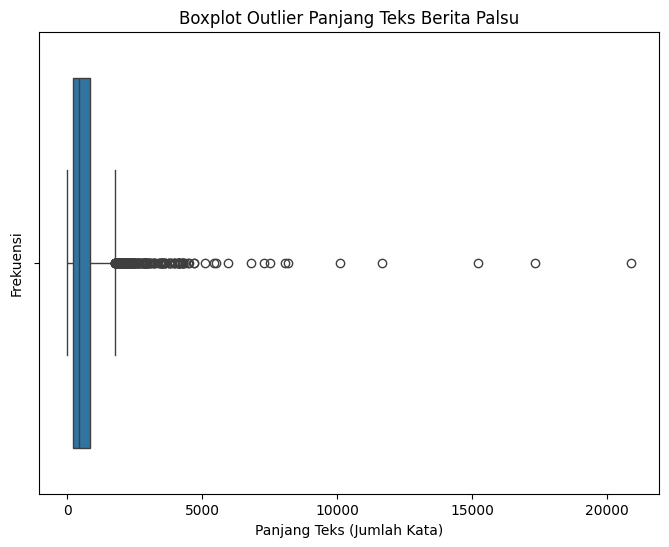

In [22]:
# buat boxplot outlier pada data dengan label FAKE
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[df['label'] == 'FAKE']['text_length'])
plt.title('Boxplot Outlier Panjang Teks Berita Palsu')
plt.xlabel('Panjang Teks (Jumlah Kata)')
plt.ylabel('Frekuensi')
plt.show()

Whisker (garis vertikal di luar kotak) memanjang hingga 1.5 kali IQR dari kuartil terdekat.Titik-titik di luar whisker dianggap sebagai potensi outlier.

Pada plot ini, kita dapat melihat sebagian besar data panjang teks berita palsu terkonsentrasi di rentang yang lebih pendek. Namun, ada sejumlah besar titik (lingkaran) yang tersebar jauh di sebelah kanan, mengindikasikan adanya banyak outlier dengan panjang teks yang jauh lebih besar dari mayoritas data. Nilai outlier yang sangat ekstrem bahkan mencapai nilai di atas 20000 pada sumbu x.

In [23]:
print("\nBeberapa contoh outlier panjang teks berita palsu:")
print(outliers_fake[['title', 'text']].head())


Beberapa contoh outlier panjang teks berita palsu:
                                                 title  \
5                                          Tehran, USA   
96   CNN: One voter can make a difference by voting...   
136  Re: 10 Things That Every American Should Know ...   
167  Fifteen Quotes Proving False Flag Terrorism & ...   
176                 Only Making Matters Worse in Syria   

                                                  text  
5      \nI’m not an immigrant, but my grandparents ...  
96   Channel list \nFollowing hurricane Matthew's f...  
136  Archives Michael On Television 10 Things That ...  
167  ARJUN WALIA OCTOBER 18, 2016 Tensions between ...  
176  Only Making Matters Worse in Syria October 28,...  


In [24]:
df = df.drop(outliers_fake.index)
df.reset_index(drop=True, inplace=True)
print("\nOutlier panjang teks berita palsu (jika ada) telah dihapus.")
df['text_length'] = df['text'].apply(lambda x: len(str(x).split())) # Perbarui panjang teks


Outlier panjang teks berita palsu (jika ada) telah dihapus.


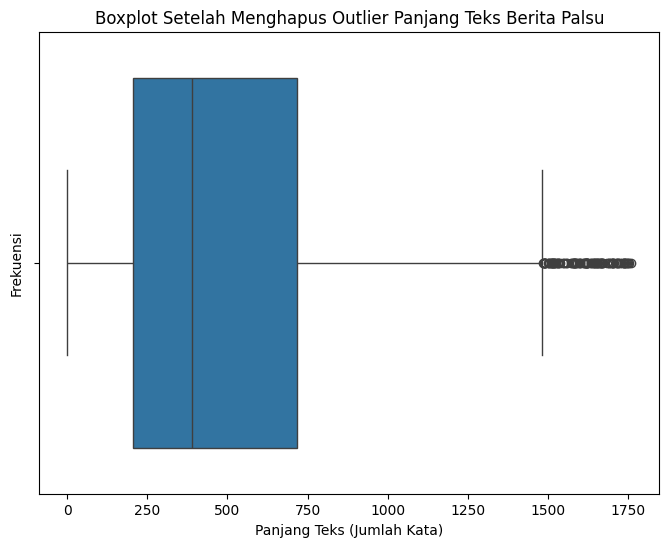

In [25]:
# cek boxplot outlier yang sudah dihapus
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[df['label'] == 'FAKE']['text_length'])
plt.title('Boxplot Setelah Menghapus Outlier Panjang Teks Berita Palsu')
plt.xlabel('Panjang Teks (Jumlah Kata)')
plt.ylabel('Frekuensi')
plt.show()

Setelah penghapusan outlier, rentang whisker menjadi jauh lebih pendek, dan tidak ada lagi titik-titik outlier yang terlihat jauh di sebelah kanan. Ini mengkonfirmasi bahwa proses penghapusan outlier (berdasarkan definisi IQR) telah berhasil menghilangkan nilai-nilai ekstrem tersebut dari visualisasi. Distribusi panjang teks berita palsu sekarang terlihat lebih terpusat dan memiliki rentang yang lebih kecil.

In [26]:
df.shape

(6081, 6)


Label Distribution:
label
REAL    3171
FAKE    2910
Name: count, dtype: int64


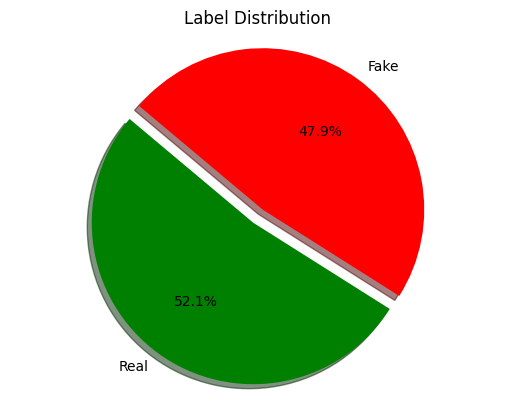

In [27]:
# 3. distribusi label setelah data cleaning dalam pie chart
print("\nLabel Distribution:")
print(df['label'].value_counts())
labels = df['label'].value_counts()
colors = ['green', 'red']
explode = (0.1, 0)
plt.pie(labels, labels=['Real', 'Fake'], colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Label Distribution')
plt.show()

Setelah penghapusan berita palsu dengan panjang teks 0 (sebanyak 36 baris) dan outlier panjang teks berita palsu (sebanyak 218 baris), jumlah berita dengan label 'FAKE' berkurang lebih banyak dibandingkan dengan 'REAL'. Awalnya, distribusinya sangat seimbang (3171 REAL vs 3164 FAKE). Sekarang, jumlah berita 'REAL' (3171) sedikit lebih banyak daripada 'FAKE' (2910).

eskipun ada perubahan, ketidakseimbangan antara kedua kelas masih relatif kecil. Rasio antara jumlah berita 'REAL' dan 'FAKE' sekarang sekitar 52.1% berbanding 47.9%. Ketidakseimbangan ringan seperti ini seringkali tidak menjadi masalah besar bagi algoritma klasifikasi

In [28]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

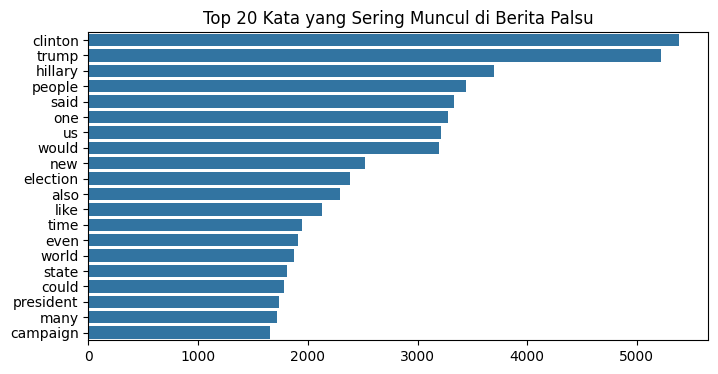

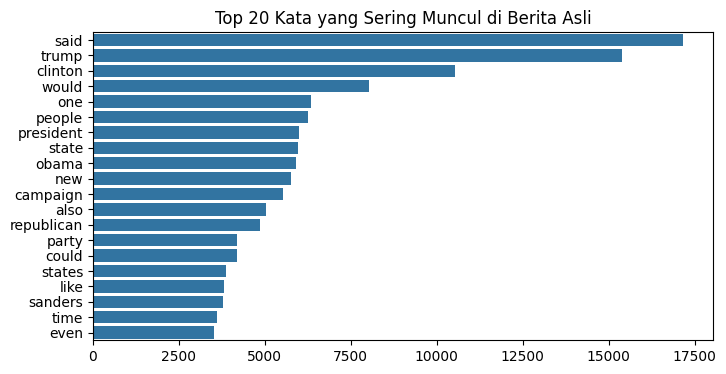

In [29]:
# 6. Kata-kata yang Sering Muncul (Sebelum Preprocessing Sederhana)
def plot_top_n_words(corpus, n=20, title='Top 20 Kata yang Sering Muncul'):
    token_dict = Counter()
    for text in corpus:
        if isinstance(text, str):
            for word in word_tokenize(text.lower()):
                if word.isalpha() and word not in stop_words:
                    token_dict[word] += 1
    top_words = token_dict.most_common(n)
    words, counts = zip(*top_words)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.show()

plot_top_n_words(df[df['label'] == 'FAKE']['text'], title='Top 20 Kata yang Sering Muncul di Berita Palsu')
plot_top_n_words(df[df['label'] == 'REAL']['text'], title='Top 20 Kata yang Sering Muncul di Berita Asli')

Barplot teks berita palsu: Bar chart yang menampilkan 20 kata paling sering muncul dalam teks berita yang berlabel 'FAKE'. Kata-kata seperti "clinton", "trump", "people", "one", "us" mendominasi. Kata-kata teratas menunjukkan fokus pada tokoh politik ("clinton", "trump"), kelompok ("people", "us"), dan kata-kata umum lainnya.

Bar chart berita asli: Bar chart yang menampilkan 20 kata paling sering muncul dalam teks berita yang berlabel 'REAL'. Kata-kata seperti "said", "trump", "clinton", "would", "one" muncul dengan frekuensi tinggi.Mirip dengan berita palsu, kata-kata teratas juga didominasi oleh tokoh politik ("trump", "clinton", "obama") dan kata-kata umum. Kata "said" muncul lebih tinggi dalam berita asli, yang mungkin mengindikasikan kutipan dan pelaporan faktual.

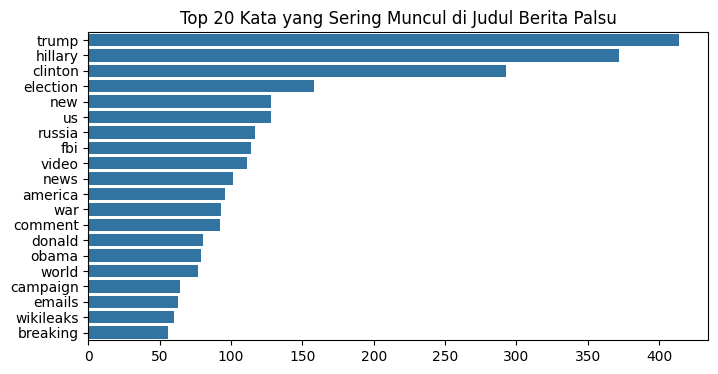

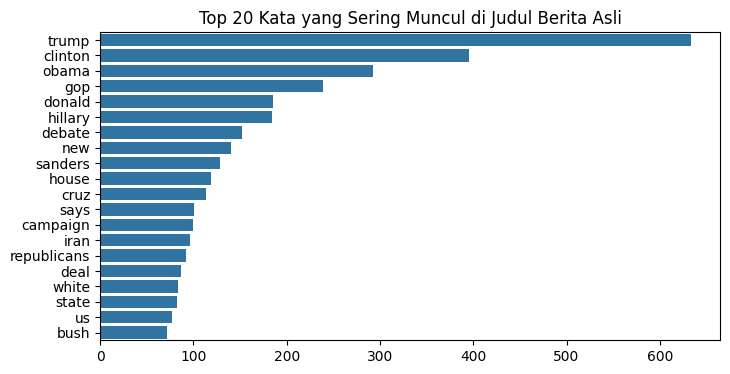

In [30]:
# 7. Kata-kata yang Sering Muncul di Judul
plot_top_n_words(df[df['label'] == 'FAKE']['title'].astype(str), title='Top 20 Kata yang Sering Muncul di Judul Berita Palsu')
plot_top_n_words(df[df['label'] == 'REAL']['title'].astype(str), title='Top 20 Kata yang Sering Muncul di Judul Berita Asli')

Meskipun topik politik umum muncul di kedua jenis judul, perbedaan dalam frekuensi dan keberadaan kata-kata spesifik (misalnya, "gop", "debate", "sanders") mungkin mencerminkan fokus berita yang berbeda atau gaya penulisan yang berbeda dalam menyampaikan informasi.

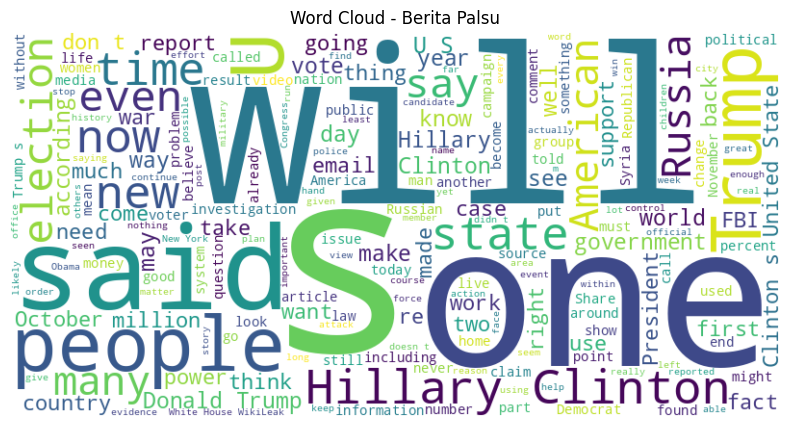

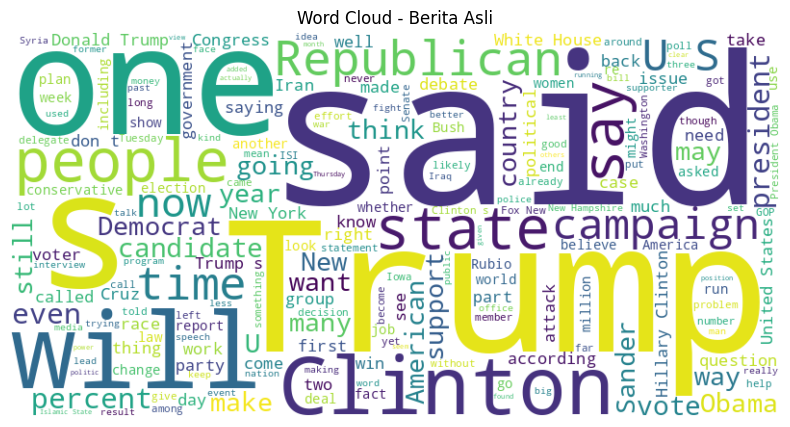

In [31]:
# 8. Word Cloud Isi Berita berdasarkan Label
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(df[df['label'] == 'FAKE']['text'].astype(str), 'Word Cloud - Berita Palsu')
generate_wordcloud(df[df['label'] == 'REAL']['text'].astype(str), 'Word Cloud - Berita Asli')

Kedua word cloud menunjukkan bahwa tokoh-tokoh politik seperti 'trump' dan 'clinton' adalah subjek yang sering dibahas baik dalam berita palsu maupun asli dalam dataset ini.

Berita asli memiliki penekanan yang lebih kuat pada kata-kata yang berkaitan dengan pemerintahan dan politik ('state', 'president', 'government', 'republican').

Kedua word cloud menunjukkan bahwa tokoh-tokoh politik seperti 'trump' dan 'clinton' adalah subjek yang sering dibahas baik dalam berita palsu maupun asli dalam dataset ini.

Perbedaan Gaya dan Isi: Ada beberapa perbedaan mencolok:
1. Berita palsu cenderung memiliki penekanan pada kata-kata yang bersifat spekulatif atau menjanjikan ('will').
2. Berita asli memiliki penekanan yang lebih kuat pada kata-kata yang berkaitan dengan pemerintahan dan politik ('state', 'president', 'government', 'republican').
3. Kemunculan kata-kata seperti 'russia' dan 'fbi' yang lebih besar dalam berita palsu mungkin mengindikasikan fokus pada narasi atau teori konspirasi tertentu.

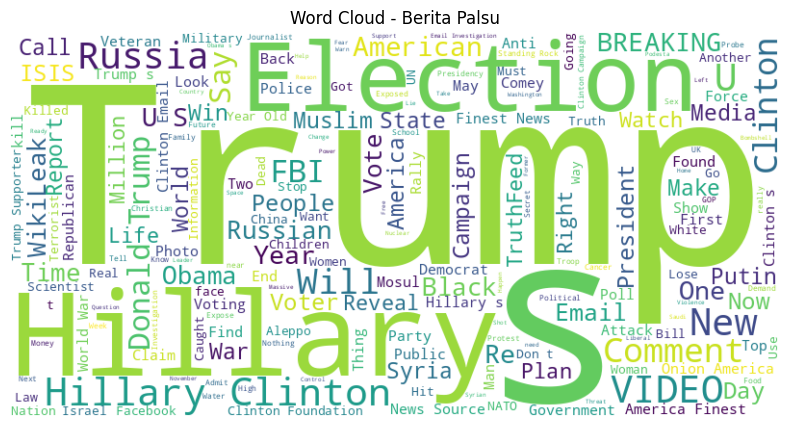

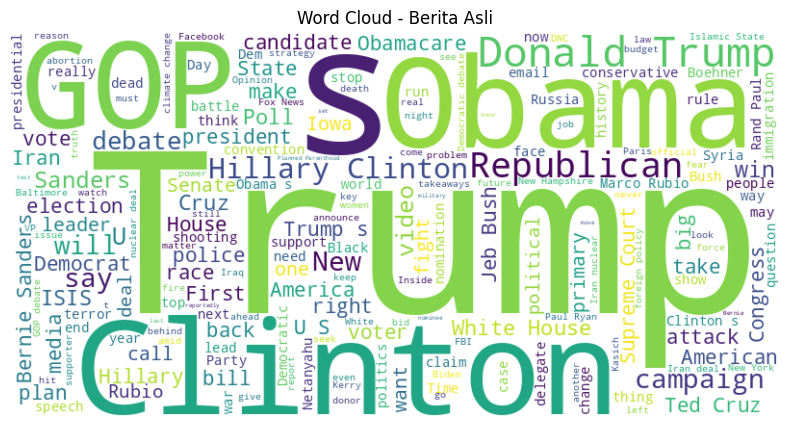

In [32]:
# 9. Word Cloud Judul Berita berdasarkan Label
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(df[df['label'] == 'FAKE']['title'].astype(str), 'Word Cloud - Berita Palsu')
generate_wordcloud(df[df['label'] == 'REAL']['title'].astype(str), 'Word Cloud - Berita Asli')

In [33]:
df.shape

(6081, 6)

# Preprocessing

In [34]:
# 1. Penghapusan Fitur yang Tidak Diperlukan
df = df.drop('Unnamed: 0', axis=1, errors='ignore')
print("Fitur 'Unnamed: 0' (jika ada) telah dihapus.")

Fitur 'Unnamed: 0' (jika ada) telah dihapus.


Kolom 'Unnamed: 0' kemungkinan besar adalah indeks bawaan dari file CSV asli. Setelah kita membaca file CSV ke dalam DataFrame Pandas, Pandas secara otomatis membuat indeksnya sendiri. Oleh karena itu, kolom 'Unnamed: 0' menjadi redundan dan tidak memberikan informasi tambahan yang berguna untuk model machine learning. Membiarkan fitur yang tidak relevan dapat meningkatkan kompleksitas model, memperlambat pelatihan, dan bahkan berpotensi mengurangi kinerja model jika model mencoba mempelajari pola yang tidak bermakna dari fitur tersebut.

In [35]:
# 9. Encoding Label
df['label_encoded'] = df['label'].map({'FAKE': 0, 'REAL': 1})
df.drop('label', axis=1, inplace=True)
print("Label telah dienkode menjadi numerik (0 untuk FAKE, 1 untuk REAL).")

Label telah dienkode menjadi numerik (0 untuk FAKE, 1 untuk REAL).


Sebagian besar algoritma machine learning, terutama yang berbasis matematika dan statistik, memerlukan input dalam bentuk numerik. Label kategori seperti 'FAKE' dan 'REAL' tidak dapat diproses secara langsung oleh algoritma ini. Oleh karena itu, kita perlu mengubah label kategori menjadi angka. Dalam kasus klasifikasi biner (dua kelas), pengkodean 0 dan 1 adalah cara yang umum dan efektif.

In [36]:
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [37]:
# Inisialisasi lemmatizer dan stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Stopwords: Stopwords seperti "the", "a", "is", "in" sering muncul dalam teks tetapi biasanya tidak membawa banyak informasi yang membedakan antara berbagai jenis dokumen. Menghapus stopwords dapat membantu model untuk fokus pada kata-kata yang lebih bermakna dan mengurangi noise dalam data.

Lemmatizer: Lemmatization adalah proses mengubah kata-kata ke bentuk dasarnya atau lemma (misalnya, "running", "ran", "runs" menjadi "run"). Ini membantu untuk menganggap kata-kata yang berbeda dengan akar yang sama sebagai satu kata, mengurangi dimensi data dan meningkatkan generalisasi model. Misalnya, tanpa lemmatization, "election" dan "elections" akan dianggap sebagai dua kata yang berbeda, padahal keduanya memiliki makna yang serupa dalam konteks klasifikasi berita.

In [38]:
# 2. Penggabungan Judul dan Teks
df['full_text'] = df['title'].astype(str) + ' ' + df['text'].astype(str)
df = df.drop(['title', 'text'], axis=1)
print("Fitur 'title' dan 'text' telah digabungkan menjadi 'full_text' dan dihapus.")

Fitur 'title' dan 'text' telah digabungkan menjadi 'full_text' dan dihapus.


Baik judul maupun isi teks mengandung informasi yang berpotensi penting untuk mengklasifikasikan berita palsu. Menggabungkannya menjadi satu fitur 'full_text' memungkinkan model untuk menganalisis seluruh konten berita secara bersamaan. Ini dapat membantu model dalam menangkap pola atau hubungan antara kata-kata dalam judul dan isi teks yang mungkin tidak terlihat jika dianalisis secara terpisah. Selain itu, setelah digabungkan, kita dapat fokus pada satu kolom teks untuk langkah-langkah preprocessing selanjutnya, menyederhanakan alur kerja.

In [39]:
def preprocess_text(text):
    if isinstance(text, str):
        # 3. Hapus Tanda Baca dan Karakter Spesial
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'[^a-zA-Z\s]', '', text, re.I)
        text = re.sub(r'\s+', ' ', text).strip()
        # 4. Konversi ke Huruf Kecil
        text = text.lower()

        # 5. Tokenisasi
        tokens = word_tokenize(text)

        # 6. Penghapusan Stopwords
        filtered_tokens = [w for w in tokens if w not in stop_words and w.isalpha()]
        return filtered_tokens
    return []

df['processed_tokens'] = df['full_text'].apply(preprocess_text)
df.drop('full_text', axis=1, inplace=True)
print("Teks telah diproses (tanda baca dihapus, lowercased, tokenized, stopwords dihapus).")

Teks telah diproses (tanda baca dihapus, lowercased, tokenized, stopwords dihapus).


- Tanda baca dan karakter spesial telah dihapus: Kita tidak melihat adanya tanda baca atau karakter selain huruf dalam token-token.
- Teks telah diubah menjadi huruf kecil: Semua token dalam list berbentuk huruf kecil.
- Teks telah ditokenisasi: Teks asli telah dipecah menjadi list kata-kata individual.
- Stopwords telah dihapus: Kata-kata umum seperti "the", "a", "is" seharusnya tidak muncul dalam list token.

In [40]:
df.head()

,title_length,text_length,label_encoded,processed_tokens
0,5,1296,0,"[smell, hillarys, fear, daniel, greenfield, sh..."
1,14,446,0,"[watch, exact, moment, paul, ryan, committed, ..."
2,9,431,1,"[kerry, go, paris, gesture, sympathy, us, secr..."
3,15,404,0,"[bernie, supporters, twitter, erupt, anger, dn..."
4,9,317,1,"[battle, new, york, primary, matters, primary,..."


Data teks sekarang berada dalam format yang lebih bersih dan terstruktur (list token) yang siap untuk diubah menjadi representasi numerik. Setiap artikel berita sekarang direpresentasikan oleh sekumpulan kata-kata penting (setelah penghapusan noise seperti tanda baca dan stopwords) yang akan digunakan sebagai fitur untuk melatih model klasifikasi.

# Feature Engineering

In [41]:
#TF-IDF
df['processed_text_string'] = df['processed_tokens'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Batasi jumlah fitur untuk menghindari dimensi tinggi
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text_string'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())  # Membuat DataFrame dari matriks TF-IDF

df.reset_index(drop=True, inplace=True)
tfidf_df.reset_index(drop=True, inplace=True)

features_df = pd.concat([tfidf_df, df[['text_length']]], axis=1)

if 'title_length' in df.columns:
    features_df = pd.concat([features_df, df[['title_length']]], axis=1)

df['unique_word_count'] = df['processed_tokens'].apply(lambda x: len(set(x)))
features_df = pd.concat([features_df, df[['unique_word_count']]], axis=1)

# data splitting 20% uji, 80% latih
X_train, X_test, y_train, y_test = train_test_split(features_df, df['label_encoded'], test_size=0.2, random_state=42)

print("Shape dari fitur training:", X_train.shape)
print("Shape dari fitur testing:", X_test.shape)
print("Shape dari target training:", y_train.shape)
print("Shape dari target testing:", y_test.shape)

print("\nBeberapa kolom fitur hasil TF-IDF:")
print(features_df.head())

Shape dari fitur training: (4864, 10003)
Shape dari fitur testing: (1217, 10003)
Shape dari target training: (4864,)
Shape dari target testing: (1217,)

Beberapa kolom fitur hasil TF-IDF:
   aaron  abaaoud  abandon  abandoned  abandoning  abbas  abbott  abby  \
0    0.0      0.0      0.0        0.0         0.0    0.0     0.0   0.0   
1    0.0      0.0      0.0        0.0         0.0    0.0     0.0   0.0   
2    0.0      0.0      0.0        0.0         0.0    0.0     0.0   0.0   
3    0.0      0.0      0.0        0.0         0.0    0.0     0.0   0.0   
4    0.0      0.0      0.0        0.0         0.0    0.0     0.0   0.0   

        abc  abcs  ...      zero  zervos  zika  zionist  zone  zones  \
0  0.000000   0.0  ...  0.000000     0.0   0.0      0.0   0.0    0.0   
1  0.064616   0.0  ...  0.060787     0.0   0.0      0.0   0.0    0.0   
2  0.000000   0.0  ...  0.000000     0.0   0.0      0.0   0.0    0.0   
3  0.000000   0.0  ...  0.000000     0.0   0.0      0.0   0.0    0.0   
4  0.00

Shape dari fitur training: (4864, 10003):
- Set fitur pelatihan memiliki 4864 sampel (baris) dan 10003 fitur (kolom). 10000 kolom berasal dari TF-IDF (sesuai dengan max_features), dan 3 kolom lainnya adalah text_length, title_length (jika ada), dan unique_word_count.

- Shape dari fitur testing: (1217, 10003): Set fitur pengujian memiliki 1217 sampel dan jumlah fitur yang sama (10003) dengan set pelatihan.

- Shape dari target training: (4864,): Set target pelatihan memiliki 4864 label yang sesuai dengan sampel pelatihan.

- Shape dari target testing: (1217,): Set target pengujian memiliki 1217 label yang sesuai dengan sampel pengujian.

- Beberapa kolom fitur hasil TF-IDF: Output features_df.head() menunjukkan beberapa kolom pertama dari DataFrame fitur. Sebagian besar kolom awal adalah hasil dari TF-IDF, di mana setiap kolom mewakili sebuah kata dalam kosakata yang dipelajari, dan nilainya adalah skor TF-IDF kata tersebut untuk setiap artikel. Kita juga melihat kolom text_length, title_length, dan unique_word_count di bagian akhir. Nilai TF-IDF biasanya berupa bilangan float antara 0 dan 1, yang mencerminkan pentingnya suatu kata dalam dokumen relatif terhadap seluruh corpus.

In [42]:
df.head()

,title_length,text_length,label_encoded,processed_tokens,processed_text_string,unique_word_count
0,5,1296,0,"[smell, hillarys, fear, daniel, greenfield, sh...",smell hillarys fear daniel greenfield shillman...,438
1,14,446,0,"[watch, exact, moment, paul, ryan, committed, ...",watch exact moment paul ryan committed politic...,203
2,9,431,1,"[kerry, go, paris, gesture, sympathy, us, secr...",kerry go paris gesture sympathy us secretary s...,179
3,15,404,0,"[bernie, supporters, twitter, erupt, anger, dn...",bernie supporters twitter erupt anger dnc trie...,186
4,9,317,1,"[battle, new, york, primary, matters, primary,...",battle new york primary matters primary day ne...,125


- Representasi Numerik Teks: Teks berita sekarang telah berhasil diubah menjadi representasi numerik menggunakan TF-IDF, yang memungkinkan algoritma machine learning untuk memprosesnya.
- Penggabungan Fitur: Fitur-fitur tambahan seperti panjang teks dan jumlah kata unik telah ditambahkan ke set fitur, yang berpotensi memberikan informasi tambahan yang berguna untuk klasifikasi.
- Pembagian Data: Dataset telah berhasil dibagi menjadi set pelatihan dan pengujian, yang penting untuk melatih model pada satu bagian data dan mengevaluasi kinerjanya pada data yang belum pernah dilihat.
- Dimensi Fitur: Jumlah fitur (10003) cukup tinggi, terutama karena kita membatasi max_features menjadi 10000. Ini umum dalam pemrosesan teks, dan model yang dipilih harus mampu menangani dimensi tinggi.

In [43]:
# simpan tf-idf vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Modeling

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score


--- Logistic Regression ---
Accuracy: 0.9096138044371405
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       571
           1       0.93      0.90      0.91       646

    accuracy                           0.91      1217
   macro avg       0.91      0.91      0.91      1217
weighted avg       0.91      0.91      0.91      1217



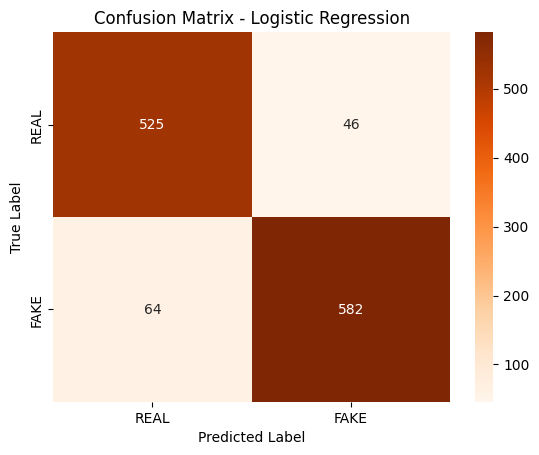

In [45]:
# Training model Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Accuracy: 0.9096138044371405: Akurasi model Logistic Regression pada data pengujian adalah sekitar 90.96%. Ini berarti sekitar 90.96% dari total prediksi model adalah benar.

Untuk kelas 0 (FAKE):
- precision: 0.89: Dari semua berita yang diprediksi sebagai FAKE, 89% di antaranya sebenarnya adalah FAKE.
- recall: 0.92: Dari semua berita yang sebenarnya FAKE, model berhasil mengidentifikasi 92% di antaranya.
- f1-score: 0.91: Rata-rata harmonik dari presisi dan recall. Ini memberikan ukuran tunggal yang menyeimbangkan presisi dan recall.
- support: 571: Jumlah sebenarnya berita FAKE dalam set pengujian.

Untuk kelas 1 (REAL):
- precision: 0.93: Dari semua berita yang diprediksi sebagai REAL, 93% di antaranya sebenarnya adalah REAL.
- recall: 0.90: Dari semua berita yang sebenarnya REAL, model berhasil mengidentifikasi 90% di antaranya.
- f1-score: 0.91: F1-score untuk kelas REAL.
- support: 646: Jumlah sebenarnya berita REAL dalam set pengujian.

macro avg: 0.91: Rata-rata presisi, recall, dan f1-score tanpa mempertimbangkan jumlah support setiap kelas.

weighted avg: 0.91: Rata-rata presisi, recall, dan f1-score dengan mempertimbangkan jumlah support setiap kelas.

1. 525 (True Negative): Jumlah berita yang sebenarnya REAL dan diprediksi sebagai REAL dengan benar.
2. 46 (False Positive): Jumlah berita yang sebenarnya REAL tetapi diprediksi sebagai FAKE secara salah.
3. 64 (False Negative): Jumlah berita yang sebenarnya FAKE tetapi diprediksi sebagai REAL secara salah.
4. 582 (True Positive): Jumlah berita yang sebenarnya FAKE dan diprediksi sebagai FAKE dengan benar.

--- Random Forest ---
Accuracy: 0.9046836483155299
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       571
           1       0.90      0.93      0.91       646

    accuracy                           0.90      1217
   macro avg       0.91      0.90      0.90      1217
weighted avg       0.91      0.90      0.90      1217



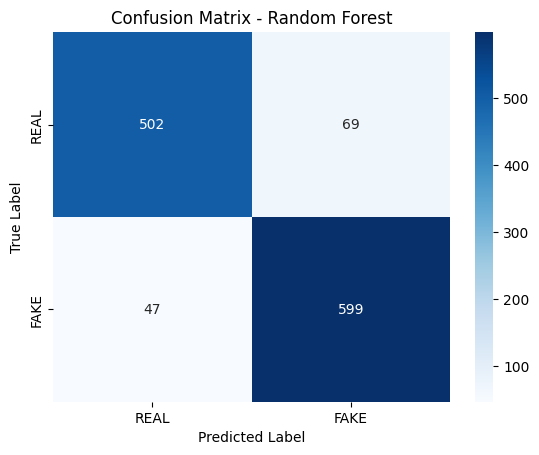

In [46]:
# Training model rendom Forest
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train) # Changed rf_model to random_forest_model
rf_pred = random_forest_model.predict(X_test) # Changed rf_model to random_forest_model
print("--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [47]:
# 1. Inisialisasi Model
logistic_model = LogisticRegression(random_state=42, solver='liblinear')

# 2. Pelatihan Model Awal
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [48]:
# 1. Inisialisasi Model
random_forest_model = RandomForestClassifier(random_state=42)

# 2. Pelatihan Model Awal
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation Before Tuning

Evaluasi Model Logistic Regression:

Akurasi: 0.9096
F1-Score: 0.9137
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       571
           1       0.93      0.90      0.91       646

    accuracy                           0.91      1217
   macro avg       0.91      0.91      0.91      1217
weighted avg       0.91      0.91      0.91      1217



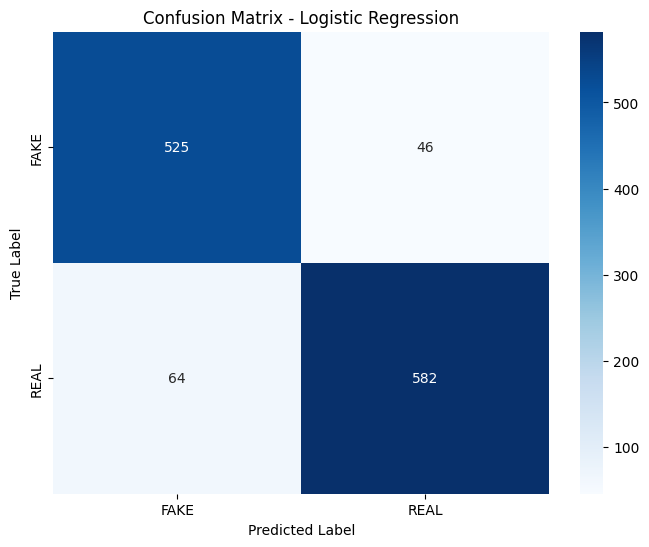

Evaluasi Model Random Forest:

Akurasi: 0.9047
F1-Score: 0.9117
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       571
           1       0.90      0.93      0.91       646

    accuracy                           0.90      1217
   macro avg       0.91      0.90      0.90      1217
weighted avg       0.91      0.90      0.90      1217



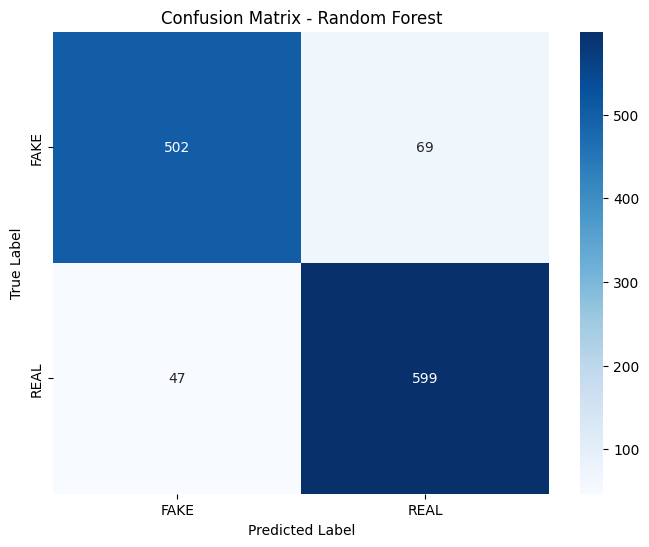

In [49]:
# 3. Evaluasi Model Awal
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Evaluasi Model {model_name}:\n")
    print(f"Akurasi: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:\n", report)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    return model, accuracy, f1, report, cm

logistic_model, lr_accuracy, lr_f1, lr_report, lr_cm = evaluate_model(logistic_model, X_test, y_test, "Logistic Regression")
random_forest_model, rf_accuracy, rf_f1, rf_report, rf_cm = evaluate_model(random_forest_model, X_test, y_test, "Random Forest")

# Hyperparameter Tuning

In [50]:
# 4. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'),
                             param_grid_lr, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr_model = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Hyperparameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}


Output ini menunjukkan bahwa GridSearchCV telah mencoba semua 12 kombinasi hyperparameter (6 nilai untuk 'C' dikalikan dengan 2 nilai untuk 'penalty'), dengan total 60 proses pelatihan dan evaluasi (fits) karena menggunakan 5-fold cross-validation.
Hyperparameter terbaik yang ditemukan untuk Logistic Regression adalah {'C': 100, 'penalty': 'l2'}.

In [51]:
# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                             param_grid_rf, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Output ini menunjukkan bahwa GridSearchCV telah mencoba semua 81 kombinasi hyperparameter (3 x 3 x 3 x 3), dengan total 405 fits.
Hyperparameter terbaik yang ditemukan untuk Random Forest adalah {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}.

# Evaluation After Tuning

Evaluasi Model Logistic Regression (Tuned):

Akurasi: 0.9367
F1-Score: 0.9403
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       571
           1       0.94      0.94      0.94       646

    accuracy                           0.94      1217
   macro avg       0.94      0.94      0.94      1217
weighted avg       0.94      0.94      0.94      1217



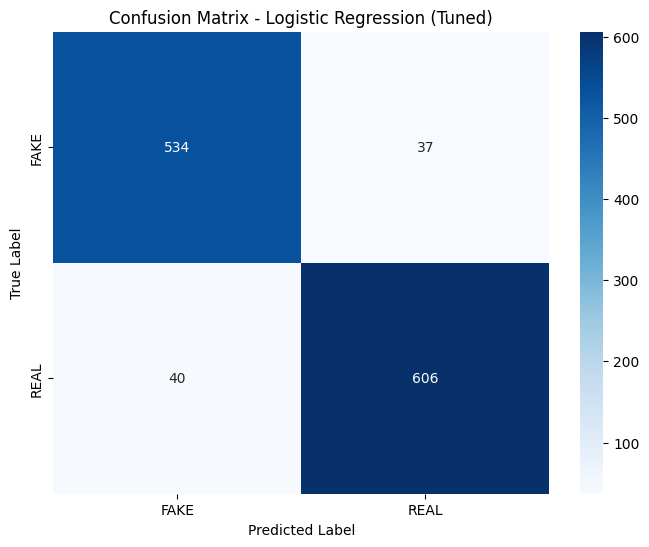

Evaluasi Model Random Forest (Tuned):

Akurasi: 0.9071
F1-Score: 0.9142
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       571
           1       0.90      0.93      0.91       646

    accuracy                           0.91      1217
   macro avg       0.91      0.91      0.91      1217
weighted avg       0.91      0.91      0.91      1217



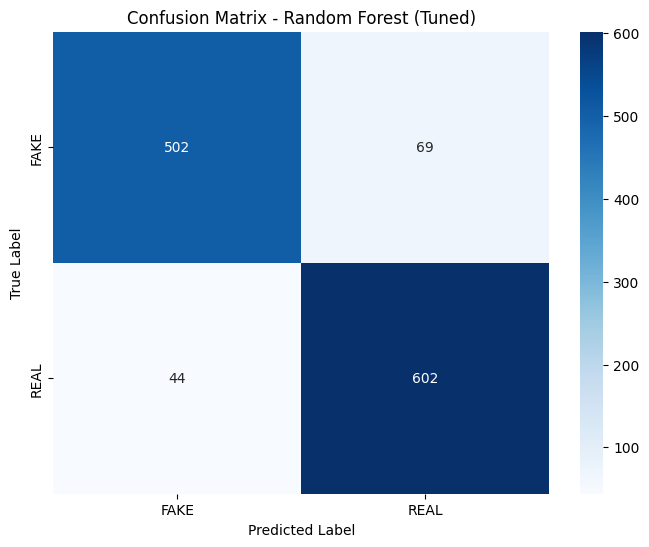

In [52]:
# 5. Evaluasi Model Setelah Tuning
best_logistic_model, best_lr_accuracy, best_lr_f1, best_lr_report, best_lr_cm = evaluate_model(best_lr_model, X_test, y_test, "Logistic Regression (Tuned)")
best_random_forest_model, best_rf_accuracy, best_rf_f1, best_rf_report, best_rf_cm = evaluate_model(best_rf_model, X_test, y_test, "Random Forest (Tuned)")

- Akurasi: 0.9367: Akurasi model Logistic Regression setelah tuning meningkat menjadi sekitar 93.67%.
- F1-Score: 0.9403: F1-score juga meningkat menjadi 0.9403 (kemungkinan ini adalah F1-score rata-rata).
- Classification Report:: Menunjukkan presisi, recall, dan F1-score untuk kelas 0 (FAKE) dan 1 (REAL) setelah tuning, yang keduanya meningkat dibandingkan sebelum tuning.
- Confusion Matrix - Logistic Regression (Tuned) (Gambar 3): Menunjukkan jumlah prediksi yang benar dan salah setelah tuning. Terjadi peningkatan jumlah true positive dan true negative, serta penurunan jumlah false positive dan false negative dibandingkan confusion matrix sebelum tuning.

- Akurasi: 0.9071: Akurasi model Random Forest setelah tuning sedikit meningkat menjadi sekitar 90.71%.
- F1-Score: 0.9142: F1-score juga sedikit meningkat.
- Classification Report:: Menunjukkan peningkatan kecil dalam presisi, recall, dan F1-score untuk kedua kelas setelah tuning.
- Confusion Matrix - Random Forest (Tuned) (Gambar 5): Menunjukkan perubahan dalam jumlah prediksi yang benar dan salah setelah tuning, dengan sedikit peningkatan dibandingkan sebelum tuning.

In [53]:
# 6. Pemilihan Model Terbaik
print("\nPerbandingan Model Terbaik:")
print(f"Logistic Regression (Tuned) - Akurasi: {best_lr_accuracy:.4f}, F1-Score: {best_lr_f1:.4f}")
print(f"Random Forest (Tuned) - Akurasi: {best_rf_accuracy:.4f}, F1-Score: {best_rf_f1:.4f}")

if best_lr_f1 > best_rf_f1:
    best_model = best_logistic_model
    best_model_name = "Logistic Regression"
else:
    best_model = best_random_forest_model
    best_model_name = "Random Forest"

print(f"\nModel Terbaik yang Dipilih: {best_model_name}")


Perbandingan Model Terbaik:
Logistic Regression (Tuned) - Akurasi: 0.9367, F1-Score: 0.9403
Random Forest (Tuned) - Akurasi: 0.9071, F1-Score: 0.9142

Model Terbaik yang Dipilih: Logistic Regression


# Saved Model

In [54]:
# save model
import pickle
with open('LR_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Interpretation

In [55]:
# 7. Interpretasi Model (Contoh untuk Logistic Regression)
if best_model_name == "Logistic Regression":
    feature_names = X_train.columns
    coefficients = best_model.coef_[0]
    feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)
    print("\nTop 10 Fitur Penting (Logistic Regression):")
    for feature, importance in feature_importance[:10]:
        print(f"{feature}: {importance:.4f}")


Top 10 Fitur Penting (Logistic Regression):
said: 11.1082
october: -9.8173
hillary: -7.3482
november: -6.3141
election: -5.7129
cruz: 5.7004
candidates: 5.4397
conservative: 5.1337
gop: 5.1052
debate: 4.9543


In [56]:
!pip freeze

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.5.5.0.38.14
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.2
bokeh==3.7.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet=

In [ ]:
# code untuk cek library / package apa saja yang digunakan pada percobaan ini
